In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# ***Load Dataset***

In [2]:
import pandas as pd

df=pd.read_csv("/content/gdrive/My Drive/BBC_news/bbc-text.csv")
print("There are : ",len(df),"Samples")
print("Number of class: ",len(df.category.unique()))
print("Details : ",df.category.unique())

There are :  2225 Samples
Number of class:  5
Details :  ['tech' 'business' 'sport' 'entertainment' 'politics']


# **Label category from text to [0,4]**

In [3]:
from sklearn.preprocessing import LabelEncoder

X=df.text
y=df.category
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)
print(y[:10])
#0: business
#1: entertainment
#2: politics
#3: sport
#4: tech

[4 0 3 3 1 2 2 3 3 1]


# **Remove Stopwords**

In [4]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
STOPWORDS = set(stopwords.words('english'))
print("STOPWORDS in English : ",STOPWORDS)
print("There are : ",len(STOPWORDS),"Stopwords in English ")

new_X=[]

for i in range(len(X)):
  tokens=word_tokenize(X[i])
  temp_sent=[]
  sent=""
  for token in tokens:
    if(token not in STOPWORDS):
      sent+=token+" "
      temp_sent.append(sent)
  new_X.append(sent)
print("Test 10 samples after remove stop words:")
print(new_X[:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
STOPWORDS in English :  {'will', 'you', 'a', 'what', 'during', 'me', 'then', 'just', 'm', 'yourselves', 'his', 'the', 'own', 'doesn', 'shan', "wouldn't", 'down', "wasn't", 'over', 'until', 'into', 'ours', 'your', 'ourselves', 'why', 'these', 'myself', 'through', 'isn', 'only', "she's", 'him', 'did', "won't", 'to', 'that', 'd', 'couldn', 'some', 'out', 'yours', 'no', "you'll", 'again', 'hasn', "doesn't", 'when', 'had', 'its', "shouldn't", 'up', "that'll", 'our', 'above', 'such', 'hadn', 'won', 'where', 'didn', 'before', 'she', 'because', 'ain', 'theirs', 'once', 'ma', 'her', 'few', 'mustn', 'have', 'those', 'but', 'shouldn', 'he', 'doing', 'between', 'for', "don't", "you've", 'off', "haven't", 'my', 'both', 'does', 'other', 'very', 'at', 'as', 'further', 'of', 'not', 'while

In [5]:
import numpy as np
X_array=np.array(new_X)
print(X_array[:10])
print(X_array.shape)

['tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time . according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes . us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices . one talked-about technologies ces digital personal video recorders ( dvr pvr ) . set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want . essentially technology allows much personalised tv . also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming . people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment . us networks cable satellite companies worried me

# **text to sequences**

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

n_most_common=5000
max_length=200
tokenizer=Tokenizer(n_most_common,oov_token="<OOV>",lower=True)
tokenizer.fit_on_texts(X_array)
print("Total unique character  : ",len(tokenizer.word_index))
#print(tokenizer.word_index)

#text to sequence
trunc_type = 'post'
padding_type = 'post'
sequences=tokenizer.texts_to_sequences(X_array)
final_X=pad_sequences(sequences,max_length,padding=padding_type,truncating=trunc_type)
test_X=pad_sequences(sequences,max_length,padding=padding_type)
print("used X has shape : ",final_X.shape)

Total unique character  :  29651
used X has shape :  (2225, 200)


In [7]:
"""
print(final_X[0])
print(final_X[0].shape)
print("Compared with ")
print(test_X[0])
print(test_X[0].shape)
"""

'\nprint(final_X[0])\nprint(final_X[0].shape)\nprint("Compared with ")\nprint(test_X[0])\nprint(test_X[0].shape)\n'

# **Split Data**

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(final_X,y,test_size=0.2)
print("Shape X_train , y_train : ",X_train.shape,y_train.shape)

print("Shape X_val , y_val : ",X_val.shape,y_val.shape)

Shape X_train , y_train :  (1780, 200) (1780,)
Shape X_val , y_val :  (445, 200) (445,)


# **Convert to Tensor and load to DATALOADER**

In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#convert to tensor
X_train_tensor=torch.from_numpy(X_train)
X_val_tensor=torch.from_numpy(X_val)
y_train_tensor=torch.from_numpy(y_train)
y_val_tensor=torch.from_numpy(y_val)

#Tensor dataset
train_dataset=TensorDataset(X_train_tensor.long(),y_train_tensor.long())
val_dataset=TensorDataset(X_val_tensor.long(),y_val_tensor.long())

#dataloader
batch_size=64
train_loader=DataLoader(train_dataset,batch_size=batch_size)
val_loader=DataLoader(val_dataset,batch_size=batch_size)

print(y_train_tensor.shape)

torch.Size([1780])


# **Define Model**

In [10]:
import torch.nn as nn

class LSTM(nn.Module):
  def __init__(self,input_size,emb_size,hidden_size,output_size,vocab_size):
    super(LSTM,self).__init__()
    self.input_size=input_size
    self.emb_size=emb_size
    self.hidden_size=hidden_size
    self.output_size=output_size
    self.vocab_size=vocab_size

    #emb layer
    self.embedding=nn.Embedding(vocab_size,emb_size)
    #lstm layer
    self.lstm=nn.LSTM(input_size=emb_size,hidden_size=hidden_size,batch_first=True,bidirectional=True)

    #logits
    self.logits=nn.Linear(hidden_size,output_size)
    self.softmax=nn.LogSoftmax()

  def forward(self,inputs):
    emb=self.embedding(inputs)
    out,(ht,ct)=self.lstm(emb)
    output=nn.Dropout(0.2)(ht[-1])
    output=self.logits(output)
    output=self.softmax(output)
    return output

input_size=max_length #=200
emb_size=256
hidden_size=64
output_size=5
vocab_size=n_most_common
lstm=LSTM(input_size,emb_size,hidden_size,output_size,vocab_size)


# **Define Loss and Optimizer**

In [11]:
learning_rate=0.01
criterion=nn.NLLLoss()
optimizer=torch.optim.Adam(lstm.parameters(),lr=learning_rate)

In [12]:
epochs=10
val_loss_list=[]
train_loss_list=[]

for epoch in range(epochs):
  step=0
  val_loss_total=0
  val_temp_list=[]
  train_temp_list=[]
  for inputs,labels in train_loader:
    lstm.zero_grad()
    output=lstm(inputs)
    labels=labels.long().squeeze_()
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    train_temp_list.append(loss)
    if(step%10==0):
      with torch.no_grad():
        val_loss=0
        step_val=len(X_val)//batch_size
        for val_inputs,val_labels in val_loader:
          val_output=lstm(val_inputs)
          #val_labels=val_labels.long().squeeze_()
          val_loss+=criterion(val_output,val_labels)*len(val_labels)
        val_loss=val_loss/len(X_val)
        print("Step : ",step," at : ","epoch : ",epoch+1," Train temp loss : ", loss.item(),"val temp Loss : ",val_loss.item())
        val_temp_list.append(val_loss)
    step+=1
  
  print("~~~~~~~~~~~~Epoch : ",epoch+1,"Train Loss : ",sum(train_temp_list).item()/len(train_temp_list)," val loss : ",sum(val_temp_list).item()/len(val_temp_list),"~~~~~~~~~~~~~~\n")
  train_loss_list.append(sum(train_temp_list).item()/len(train_temp_list))
  val_loss_list.append(sum(val_temp_list).item()/len(val_temp_list))

Step :  10  at :  epoch :  1  Train temp loss :  1.3336511850357056 val temp Loss :  1.3974875211715698
Step :  20  at :  epoch :  1  Train temp loss :  1.1996184587478638 val temp Loss :  1.0588808059692383
~~~~~~~~~~~~Epoch :  1 Train Loss :  1.244370460510254  val loss :  1.344326655069987 ~~~~~~~~~~~~~~

Step :  0  at :  epoch :  2  Train temp loss :  0.5027512907981873 val temp Loss :  0.6661935448646545
Step :  10  at :  epoch :  2  Train temp loss :  0.2983529567718506 val temp Loss :  0.46452435851097107
Step :  20  at :  epoch :  2  Train temp loss :  0.2721923887729645 val temp Loss :  0.49244236946105957
~~~~~~~~~~~~Epoch :  2 Train Loss :  0.24952539375850133  val loss :  0.5410534143447876 ~~~~~~~~~~~~~~

Step :  0  at :  epoch :  3  Train temp loss :  0.0918211117386818 val temp Loss :  0.4990060329437256
Step :  10  at :  epoch :  3  Train temp loss :  0.04382654279470444 val temp Loss :  0.48620083928108215
Step :  20  at :  epoch :  3  Train temp loss :  0.060535557568

In [13]:
correct=0
for val_inputs, val_labels in val_loader:
  #print("real: \n",val_labels)
  val_predicted=lstm(val_inputs)
  #print("predict : \n ",torch.max(val_predicted.data,1)[1])
  idx_predicted=torch.max(val_predicted.data,1)[1]
  correct+=(idx_predicted==val_labels).sum()
  #print("end \n")
print("Val ACC: ",correct.item()/len(X_val)*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Val ACC:  91.46067415730337


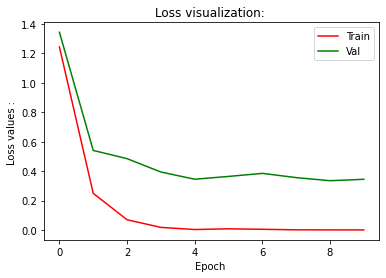

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_loss_list)),train_loss_list,'r')
plt.plot(np.arange(len(val_loss_list)),val_loss_list,'g')
plt.title("Loss visualization: ")
plt.xlabel("Epoch ")
plt.ylabel("Loss values : ")
plt.legend(['Train','Val'],loc='upper right')